# Clark Growth Curves

In [1]:
import chainladder as cl
import numpy as np


This example demonstrates one of the attributes of the :class:`ClarkLDF`. We can
use the growth curve ``G_`` to estimate the percent of ultimate at any given
age.


In [2]:
# Grab Industry triangles
clrd = cl.load_sample('clrd').groupby('LOB').sum()

# Fit Clark Cape Cod method
model = cl.ClarkLDF(growth='loglogistic').fit(
    clrd['CumPaidLoss'],
    sample_weight=clrd['EarnedPremDIR'].latest_diagonal)

# sample ages
ages = np.linspace(1, 300, 30)

# Plot results
results = model.G_(ages).T

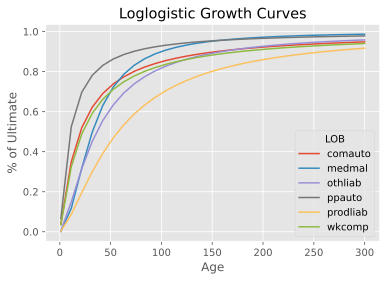

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

ax = results.plot(
    title='Loglogistic Growth Curves',
    xlabel='Age', ylabel='% of Ultimate');

In [ ]:
from myst_nb import glue
glue("plot_clarkldf", ax.get_figure(), display=False)